In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [12]:
nb_iters = 300
lrn_rate = 0.1
beta1 = 0.95
beta2 = 0.999
eps = 0.00000001

In [13]:
class Adam(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))
        x_new = x - self.lrn_rate * m_adj / np.sqrt(v_adj + self.eps)
        return x_new

In [14]:
class diffGrad(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order
        self.g_prev = 0.0

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))
        dfc = 1.0 / (1.0 + np.exp(-np.abs(self.g_prev - g)))
        x_new = x - self.lrn_rate * m_adj * dfc / (np.sqrt(v_adj) + self.eps)
        self.g_prev = g
        return x_new

In [15]:
class sqFm(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order
        self.g_prev = 0.0

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta1) * self.m ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))
        dfc = 1.0 / (1.0 + np.exp(g))
        #dfc = 1.0 / (1.0 + np.exp(-np.abs(m_adj - v_adj)))
        x_new = x - self.lrn_rate * m_adj * dfc / (np.sqrt(v_adj) + self.eps)
        self.g_prev = g
        return x_new

In [16]:
class AngularGradCos(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order
        self.g_prev = 0.0
        self.min = 0.0

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))

        tan_theta = abs((self.g_prev - g) / (1 + self.g_prev * g))
        cos_theta = 1 / np.sqrt(1 + tan_theta**2)
        angle = np.arctan(tan_theta) * (180 / 3.141592653589793238)



        if angle > self.min:
            self.min = angle
            diff = abs(self.g_prev - g)
            final_cos_theta = cos_theta
        else:
            self.min = angle
            diff = abs(self.g_prev - g)
            final_cos_theta = cos_theta

        dfc = 1.0 / (1.0 + np.exp(final_cos_theta))
        x_new = x - self.lrn_rate * m_adj * dfc / (np.sqrt(v_adj) + self.eps)
        self.g_prev = g
        return x_new


In [17]:
class AngularGradTan(object):
    def __init__(self, lrn_rate, beta1, beta2, eps):
        self.lrn_rate = lrn_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.idx = 0
        self.m = 0.0 # 1st order
        self.v = 0.0 # 2nd order
        self.g_prev = 0.0
        self.min = 0.0

    def update(self, x, g):
        self.idx += 1
        self.m = self.beta1 * self.m + (1.0 - self.beta1) * g
        self.v = self.beta2 * self.v + (1.0 - self.beta2) * g ** 2
        m_adj = self.m / (1.0 - np.power(self.beta1, self.idx))
        v_adj = self.v / (1.0 - np.power(self.beta2, self.idx))

        tan_theta = abs((self.g_prev - g) / (1 + self.g_prev * g))
        cos_theta = 1 / np.sqrt(1 + tan_theta**2)
        angle = np.arctan(tan_theta) * (180 / 3.141592653589793238)

        if angle > self.min:
            self.min = angle
            diff = abs(self.g_prev - g)
            final_tan_theta = tan_theta
        else:
            self.min = angle
            diff = abs(self.g_prev - g)
            final_tan_theta = tan_theta

        dfc = 1.0 / (1.0 + np.exp(final_tan_theta))
        x_new = x - self.lrn_rate * m_adj * dfc / (np.sqrt(v_adj) + self.eps)
        self.g_prev = g
        return x_new

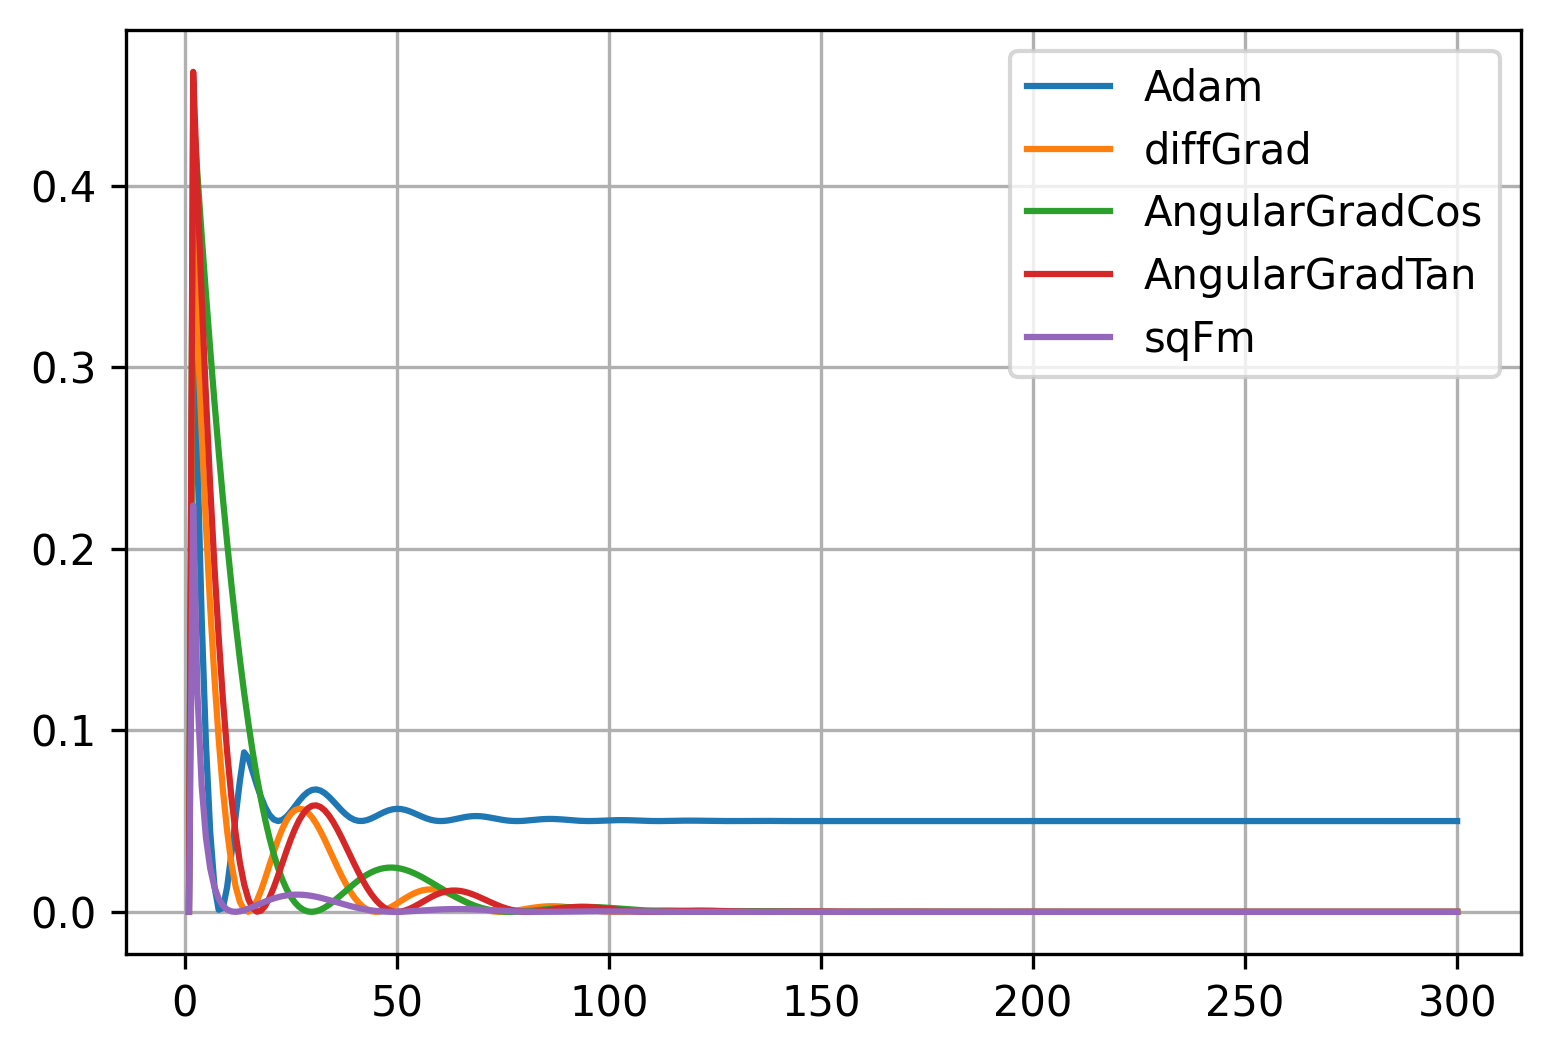

In [18]:
def fun1(x):
    if x <= 0:
        return (x + 0.3)*(x + 0.3)
    else:
        return (x - 0.2)*(x - 0.2) + 0.05

def calc_grad(x):
    if x <= 0:
        return 2*x + 0.6
    else:
        return 2*x - 0.4

# optimize with the specified solver
def solve(x0, solver):
    x = np.zeros(nb_iters)
    y = np.zeros(nb_iters)
    x[0] = x0
    for idx_iter in range(1, nb_iters):
        g = calc_grad(x[idx_iter - 1])
        x[idx_iter] = solver.update(x[idx_iter - 1], g)
        y[idx_iter] = fun1(x[idx_iter])
    return x, y


x = {}
y = {}
x0 = -1.0
solver = Adam(lrn_rate, beta1, beta2, eps)
x['adam'], y['adam'] = solve(x0, solver)
solver = AngularGradCos(lrn_rate, beta1, beta2, eps)
x['AngularGradCos'], y['AngularGradCos'] = solve(x0, solver)
solver = AngularGradTan(lrn_rate, beta1, beta2, eps)
x['AngularGradTan'], y['AngularGradTan'] = solve(x0, solver)
solver = diffGrad(lrn_rate, beta1, beta2, eps)
x['diffGrad'], y['diffGrad'] = solve(x0, solver)

solver = sqFm(lrn_rate, beta1, beta2, eps)
x['sqFm'], y['sqFm'] = solve(x0, solver)

plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.figsize'] = [6.0, 4.0]

plt.plot(np.arange(nb_iters) + 1, y['adam'], label='Adam')
plt.plot(np.arange(nb_iters) + 1, y['diffGrad'], label='diffGrad')
plt.plot(np.arange(nb_iters) + 1, y['AngularGradCos'], label='AngularGradCos')
plt.plot(np.arange(nb_iters) + 1, y['AngularGradTan'], label='AngularGradTan')
plt.plot(np.arange(nb_iters) + 1, y['sqFm'], label='sqFm')

plt.legend()
plt.grid()
plt.show()

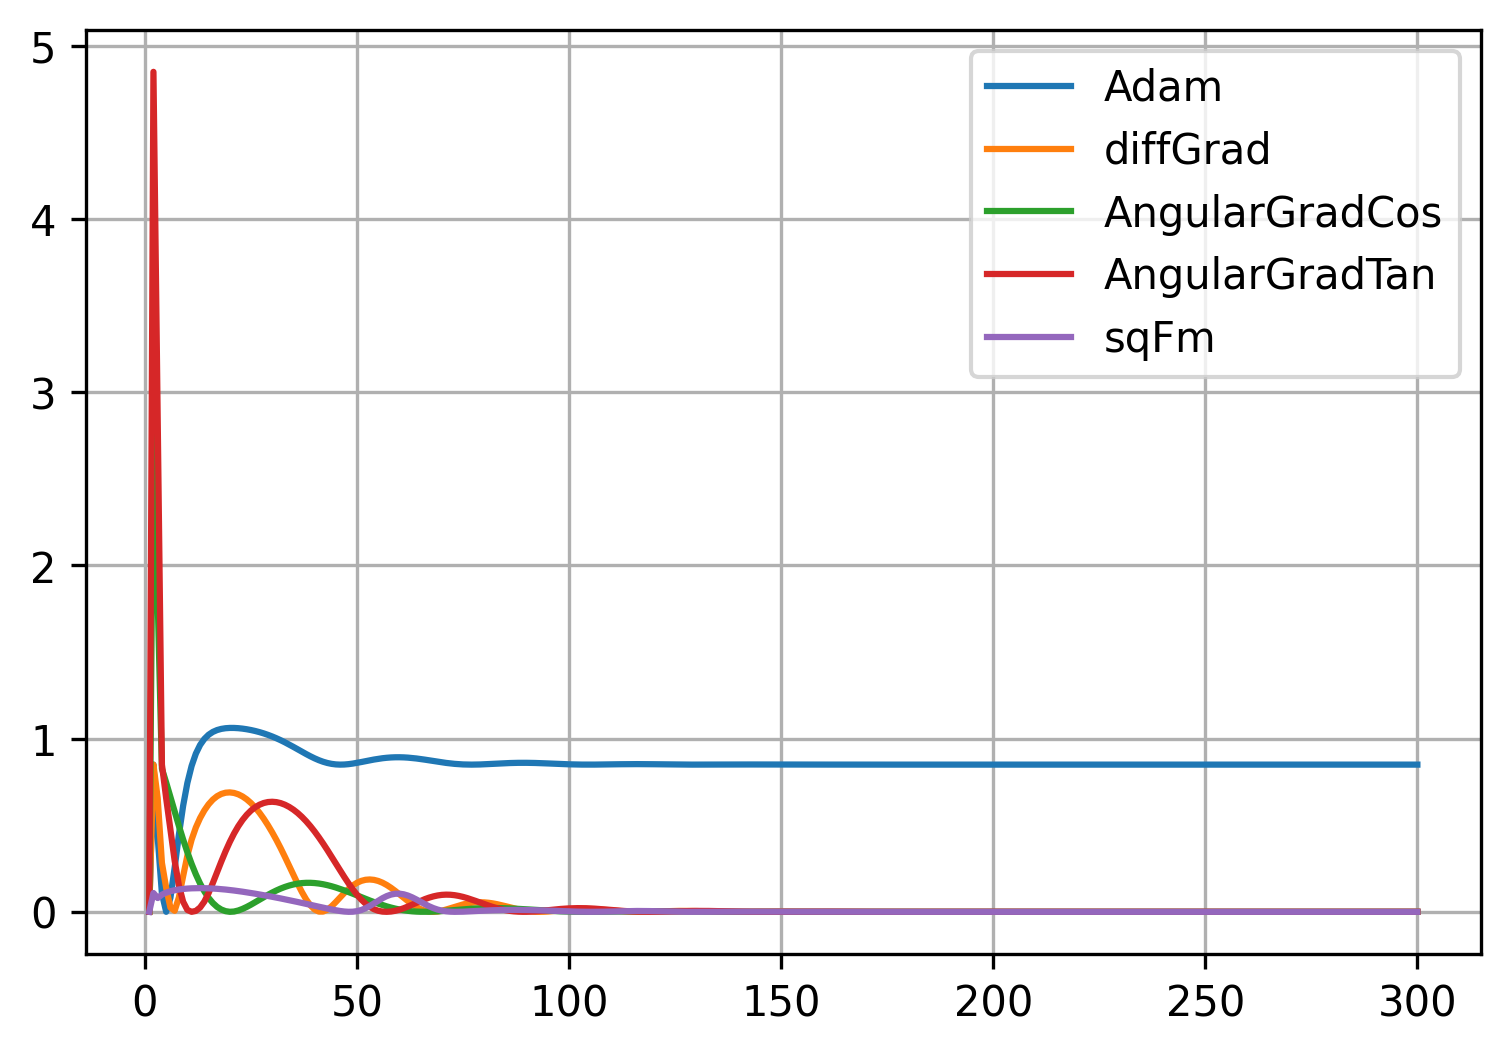

In [19]:
def fun1(x):
  if x <= -0.9:
      return -40 * x - 35.15
  else:
      return (x * x * x) + x * mt.sin(x * 8) + 0.85

def calc_grad(x):
    if x <= -0.9:
        return -40
    else:
        return 8 * x * mt.cos(8 * x) + mt.sin(8 * x) + 3 * x * x

# optimize with the specified solver
def solve(x0, solver):
    x = np.zeros(nb_iters)
    y = np.zeros(nb_iters)
    x[0] = x0
    for idx_iter in range(1, nb_iters):
        g = calc_grad(x[idx_iter - 1])
        x[idx_iter] = solver.update(x[idx_iter - 1], g)
        y[idx_iter] = fun1(x[idx_iter])
    return x, y

# Adam & diffGrad
x = {}
y = {}
x0 = -1.0
solver = Adam(lrn_rate, beta1, beta2, eps)
x['adam'], y['adam'] = solve(x0, solver)
solver = AngularGradCos(lrn_rate, beta1, beta2, eps)
x['AngularGradCos'], y['AngularGradCos'] = solve(x0, solver)
solver = AngularGradTan(lrn_rate, beta1, beta2, eps)
x['AngularGradTan'], y['AngularGradTan'] = solve(x0, solver)
solver = diffGrad(lrn_rate, beta1, beta2, eps)
x['diffGrad'], y['diffGrad'] = solve(x0, solver)

solver = sqFm(lrn_rate, beta1, beta2, eps)
x['sqFm'], y['sqFm'] = solve(x0, solver)
# visualization
plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.figsize'] = [6.0, 4.0]

plt.plot(np.arange(nb_iters) + 1, y['adam'], label='Adam')
plt.plot(np.arange(nb_iters) + 1, y['diffGrad'], label='diffGrad')
plt.plot(np.arange(nb_iters) + 1, y['AngularGradCos'], label='AngularGradCos')
plt.plot(np.arange(nb_iters) + 1, y['AngularGradTan'], label='AngularGradTan')
plt.plot(np.arange(nb_iters) + 1, y['sqFm'], label='sqFm')

plt.legend()
plt.grid()
plt.show()

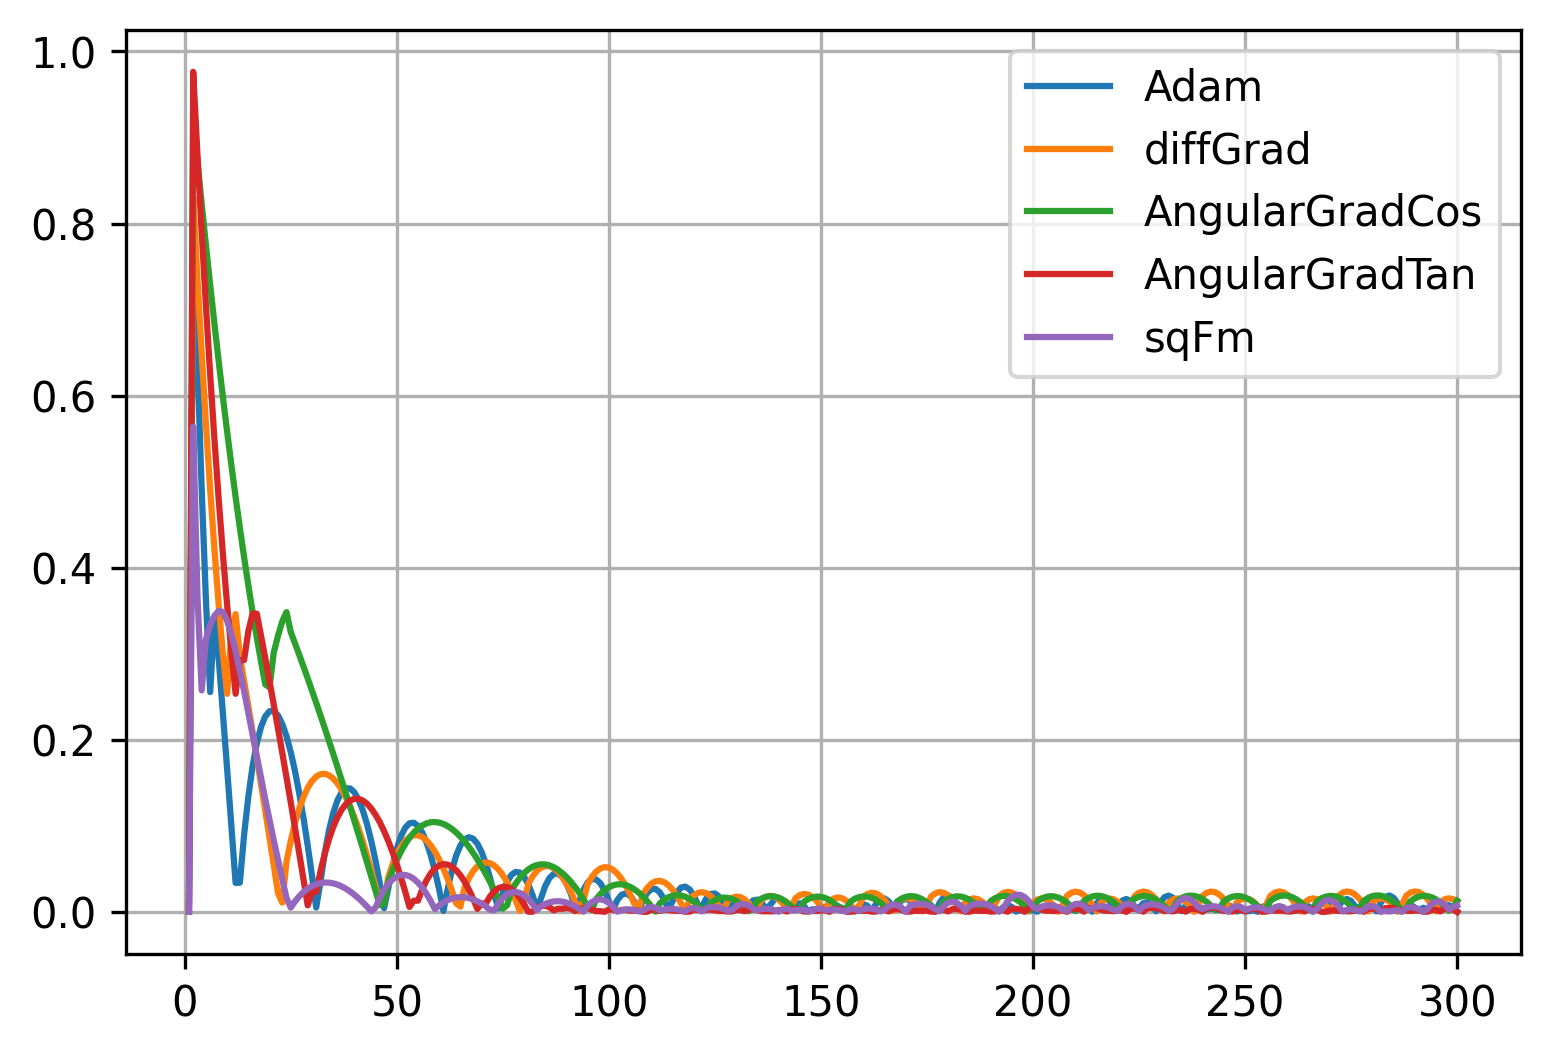

In [20]:
def fun1(x):
    if x <= -0.5:
        return x * x
    elif x <= -0.4:
        return .75 + x
    elif x <= 0.0:
        return -7*x/8
    elif x <= 0.4:
        return 7*x/8
    elif x <= 0.5:
        return 0.75 - x
    else:
        return x * x
def calc_grad(x):
    if x <= -0.5:
        return 2 * x
    elif x <= -0.4:
        return 1.0
    elif x <= 0.0:
        return -7/8
    elif x <= 0.4:
        return 7/8
    elif x <= 0.5:
        return -1.0
    else:
        return 2 * x
# optimize with the specified solver
def solve(x0, solver):
    x = np.zeros(nb_iters)
    y = np.zeros(nb_iters)
    x[0] = x0
    for idx_iter in range(1, nb_iters):
        g = calc_grad(x[idx_iter - 1])
        x[idx_iter] = solver.update(x[idx_iter - 1], g)
        y[idx_iter] = fun1(x[idx_iter])
    return x, y

x = {}
y = {}
x0 = -1.0
solver = Adam(lrn_rate, beta1, beta2, eps)
x['adam'], y['adam'] = solve(x0, solver)
solver = AngularGradCos(lrn_rate, beta1, beta2, eps)
x['AngularGradCos'], y['AngularGradCos'] = solve(x0, solver)
solver = AngularGradTan(lrn_rate, beta1, beta2, eps)
x['AngularGradTan'], y['AngularGradTan'] = solve(x0, solver)
solver = diffGrad(lrn_rate, beta1, beta2, eps)
x['diffGrad'], y['diffGrad'] = solve(x0, solver)

solver = sqFm(lrn_rate, beta1, beta2, eps)
x['sqFm'], y['sqFm'] = solve(x0, solver)

# visualization
plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.figsize'] = [6.0, 4.0]

plt.plot(np.arange(nb_iters) + 1, y['adam'], label='Adam')
plt.plot(np.arange(nb_iters) + 1, y['diffGrad'], label='diffGrad')
plt.plot(np.arange(nb_iters) + 1, y['AngularGradCos'], label='AngularGradCos')
plt.plot(np.arange(nb_iters) + 1, y['AngularGradTan'], label='AngularGradTan')
plt.plot(np.arange(nb_iters) + 1, y['sqFm'], label='sqFm')

plt.legend()
plt.grid()
plt.show()